In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import os
# import random
# import shutil

from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Input, Flatten, GlobalAveragePooling2D, Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l1, l2
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import load_model

# from sklearn.metrics import classification_report, confusion_matrix

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
TRAIN_DATA = '/kaggle/input/gunungmerapi/GunungMerapi'
VAL_DATA = '/kaggle/input/gunungmerapi/GunungMerapi'
TEST_DATA = '/kaggle/input/gunungmerapi/GunungMerapi'

In [3]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss',  # Metrik yang akan diawasi (dalam hal ini, loss pada set validasi)
                              factor=0.1,          # Faktor pengurangan (learning rate baru = learning rate sekarang * factor)
                              patience=3,          # Jumlah epoch tanpa perbaikan sebelum mengurangi learning rate
                              min_lr=0.000001)     # Batas bawah untuk learning rate


In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Definisikan path folder dataset
input_path_kaggle = "/kaggle/input/gunungmerapi/GunungMerapi"

# Inisialisasi objek ImageDataGenerator untuk augmentasi data (opsional)
datagen = ImageDataGenerator(
    rescale=1./255,   # Normalisasi intensitas piksel
    validation_split=0.3  # Persentase data untuk validasi
)

# Tentukan dimensi gambar dan batch size
img_size = (224, 224)
batch_size = 32

# Persiapkan data latih dengan pembagian untuk validasi
training_generator = datagen.flow_from_directory(
    input_path_kaggle,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Bagian data latih
)

# Persiapkan data validasi
validation_generator = datagen.flow_from_directory(
    input_path_kaggle,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # Bagian data validasi
)

# Cek kelas-kelas yang ditemukan
print(validation_generator.class_indices)

Found 1285 images belonging to 4 classes.
Found 549 images belonging to 4 classes.
{'MalamTampak': 0, 'MalamTertutup': 1, 'SiangTampak': 2, 'SiangTertutup': 3}


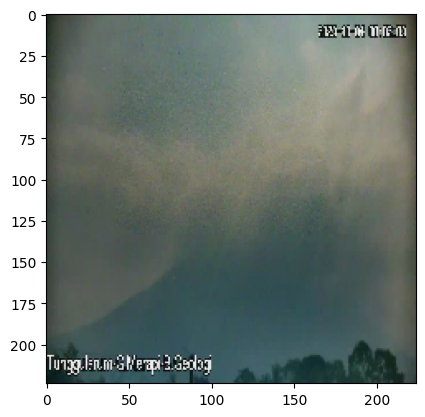

In [5]:
train, labels = next(training_generator)
plt.imshow(train[0])

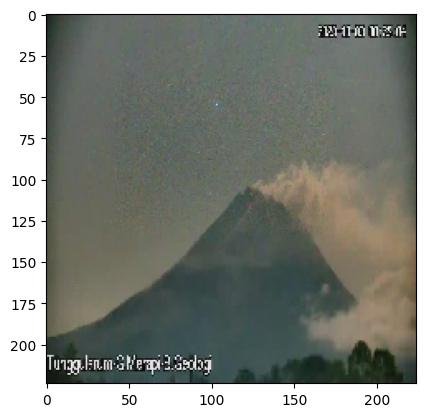

In [6]:
val, val_labels = next(validation_generator)
plt.imshow(val[1])

In [7]:
# Hyperparameter Config
BATCH_SIZE = 32
DROPOUT = 0.3
LEARNING_RATES = 0.0001
SEC_OP_PARAMETER = {"rho": 'NO'}
OPTIMIZER = Adam(learning_rate=LEARNING_RATES, beta_1=0.9, beta_2=0.999)
EPOCH = 15
FILENAME = f"fr-rd-bs{BATCH_SIZE}-do{int(DROPOUT*100)}-adam-lr0001-ep{EPOCH}.h5"

print(FILENAME)

fr-rd-bs32-do30-adam-lr0001-ep15.h5


Filename: fr-rd-bs32-do30-adam-lr0001-ep15.h5 
Dropout: 0.3 
Learning Rate: 0.0001 
Optimizer: <keras.src.optimizers.adam.Adam object at 0x7bf8612cfc70> 
Epoch: 15
58889256/58889256 [==============================] - 0s 0us/step

Layer status FREEZING LAYER
Model  <keras.src.engine.functional.Functional object at 0x7bf855cc4550> has been compile

Epoch 1/20
41/40 [==============================] - ETA: 0s - loss: 1.0607 - accuracy: 0.5284
Epoch 1: val_accuracy improved from -inf to 0.79911, saving model to fr-rd-bs32-do30-adam-lr0001-ep15.h5
40/40 [==============================] - 22s 222ms/step - loss: 1.0607 - accuracy: 0.5284 - val_loss: 0.6202 - val_accuracy: 0.7991 - lr: 0.0010
Epoch 2/20


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


41/40 [==============================] - ETA: 0s - loss: 0.4705 - accuracy: 0.7938
Epoch 2: val_accuracy improved from 0.79911 to 0.90402, saving model to fr-rd-bs32-do30-adam-lr0001-ep15.h5
40/40 [==============================] - 8s 186ms/step - loss: 0.4705 - accuracy: 0.7938 - val_loss: 0.4556 - val_accuracy: 0.9040 - lr: 0.0010
Epoch 3/20
41/40 [==============================] - ETA: 0s - loss: 0.3276 - accuracy: 0.8319
Epoch 3: val_accuracy improved from 0.90402 to 0.93080, saving model to fr-rd-bs32-do30-adam-lr0001-ep15.h5
40/40 [==============================] - 8s 193ms/step - loss: 0.3276 - accuracy: 0.8319 - val_loss: 0.2089 - val_accuracy: 0.9308 - lr: 0.0010
Epoch 4/20
41/40 [==============================] - ETA: 0s - loss: 0.2764 - accuracy: 0.8708
Epoch 4: val_accuracy did not improve from 0.93080
40/40 [==============================] - 8s 182ms/step - loss: 0.2764 - accuracy: 0.8708 - val_loss: 0.5110 - val_accuracy: 0.8795 - lr: 0.0010
Epoch 5/20
41/40 [============

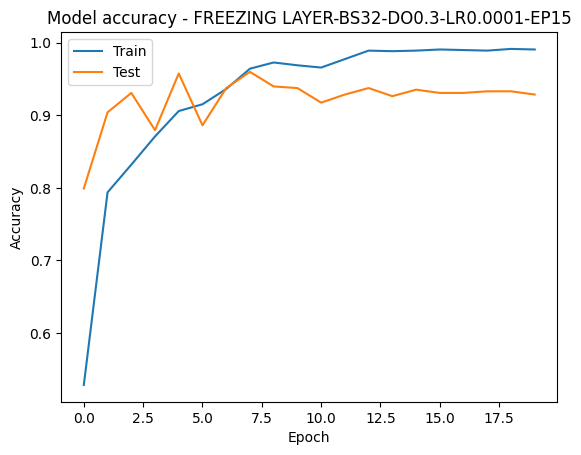

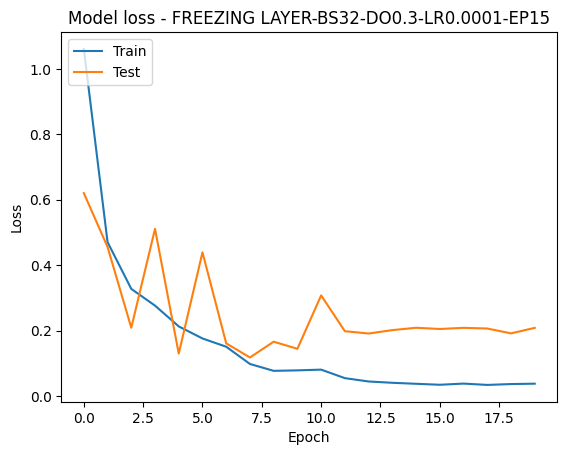

In [8]:
print(
    'Filename:', FILENAME,
    '\nDropout:', DROPOUT,
    '\nLearning Rate:', LEARNING_RATES,
#     '\nSec OP Param', SEC_OP_PARAMETER,
    '\nOptimizer:', OPTIMIZER,
    '\nEpoch:', EPOCH
)

base_model = VGG16(input_shape=(500, 500, 3), weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(DROPOUT)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(DROPOUT)(x)
prediction = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=prediction)

LAYER = 'FREEZING LAYER'
for layer in base_model.layers:
    layer.trainable = False     
    
# LAYER = 'FINE TUNING'
# for layer in model.layers[:10]:
#     layer.trainable = False
# for layer in model.layers[10:]:
#     layer.trainable = True
    
model.compile(
    optimizer= Adam(), 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy']
)

print('\nLayer status', LAYER)
print('Model ', model, 'has been compile\n')

checkpointer = ModelCheckpoint(
    filepath = FILENAME,
    monitor = 'val_accuracy',
    verbose=1, 
    save_best_only = True
)

history = model.fit(
    training_generator,
    epochs = 20, 
    verbose = 1,
    validation_data = validation_generator,
    workers = 4,
    steps_per_epoch = training_generator.samples/BATCH_SIZE, 
    validation_steps = validation_generator.samples*0.8/BATCH_SIZE,
    callbacks = [checkpointer, reduce_lr]
    
)

print(
    '\nFilename:', FILENAME,
    '\nBatch Size:', BATCH_SIZE,
    '\nDropout:', DROPOUT,
    '\nLearning Rate:', LEARNING_RATES,
#     '\nSec OP Param', SEC_OP_PARAMETER,
    '\nOptimizer:', OPTIMIZER,
    '\nEpoch:', EPOCH
)

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title(f"Model accuracy - {LAYER}-BS{BATCH_SIZE}-DO{DROPOUT}-LR{LEARNING_RATES}-EP{EPOCH}")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(f"Model loss - {LAYER}-BS{BATCH_SIZE}-DO{DROPOUT}-LR{LEARNING_RATES}-EP{EPOCH}")
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Berhasil load model fr-rd-bs32-do30-adam-lr0001-ep15.h5
18/18 [==============================] - 5s 276ms/step - loss: 0.1119 - accuracy: 0.9581

Model fr-rd-bs32-do30-adam-lr0001-ep15.h5
Loss: 0.11188065260648727
Acc: 0.9581056237220764


18/18 [==============================] - 5s 288ms/step


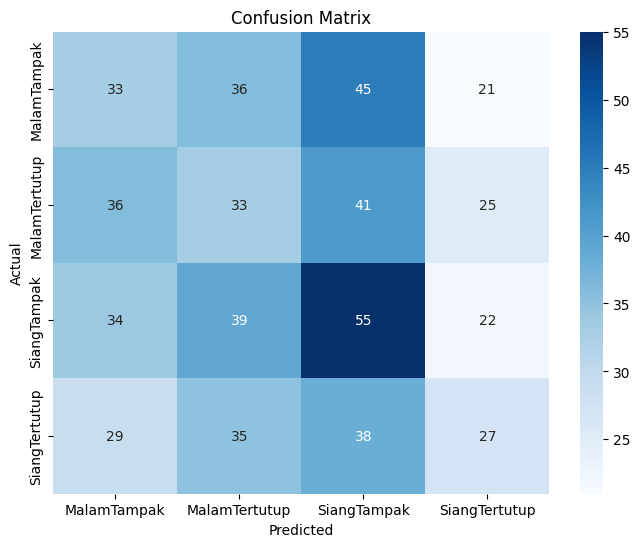

In [9]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

MODEL_FILENAME = FILENAME

load_model_evl = load_model(MODEL_FILENAME)
print('Berhasil load model', MODEL_FILENAME)

# res_evl = load_model_evl.evaluate(test_dataset)
test_loss, test_accuracy = load_model_evl.evaluate(validation_generator)

print('\nModel', MODEL_FILENAME)
print("Loss:", test_loss)
print("Acc:", test_accuracy)
print('\n')

# CONFUSSION MATRIX
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

confusion = confusion_matrix(y_true, y_pred_classes)

class_names = validation_generator.class_indices.keys()

# Membuat heatmap dari confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()